# Python Feature Engineering Cookbook
    
    AUTHOR: Dr. Soledad Galli

### Chapter 3: Transforming Numerical Variables

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

**NOTA**. Sólo se incluye el código de NumPy y Scikit-learn

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# Plot histogram and Q-Q plots to explore the variable distribution

def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

# Logarithm transformation

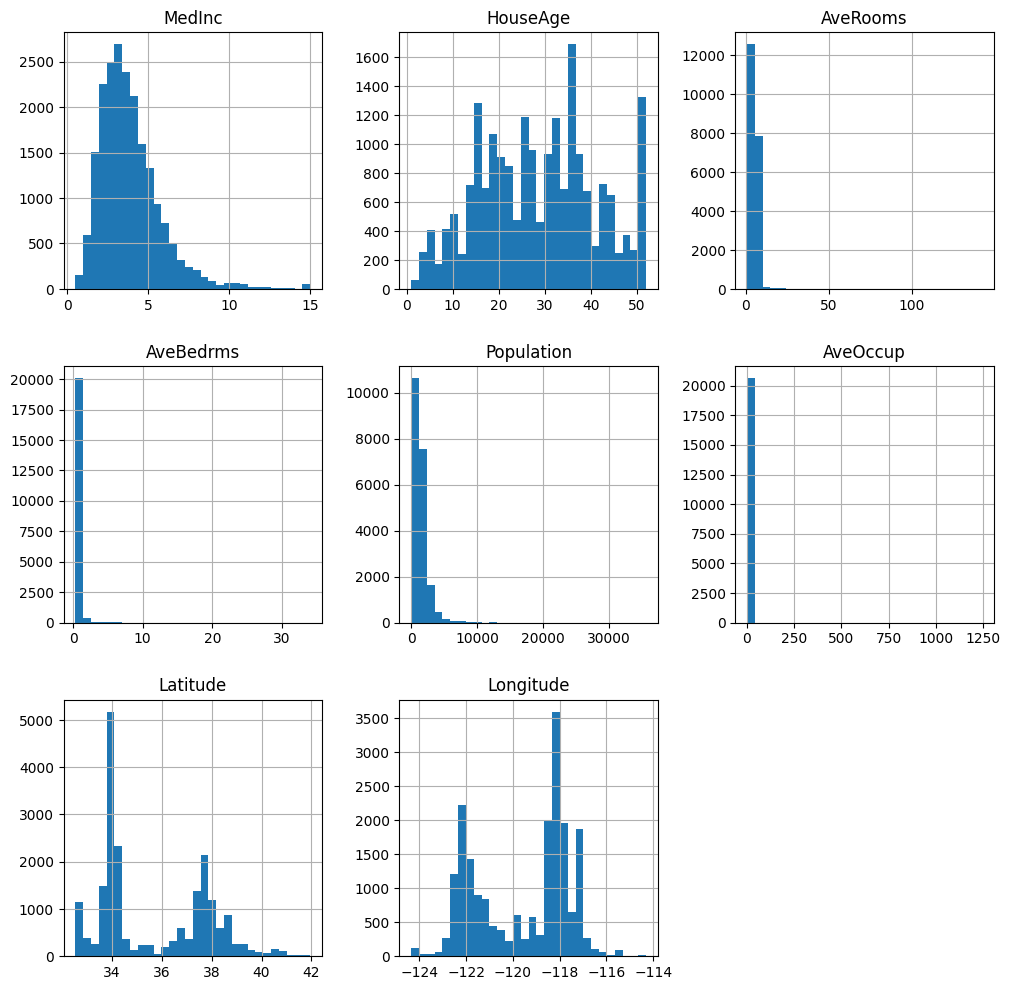

In [4]:
# Plot histograms to inspect variable distributions
X.hist(bins=30, figsize=(12, 12))
plt.show()

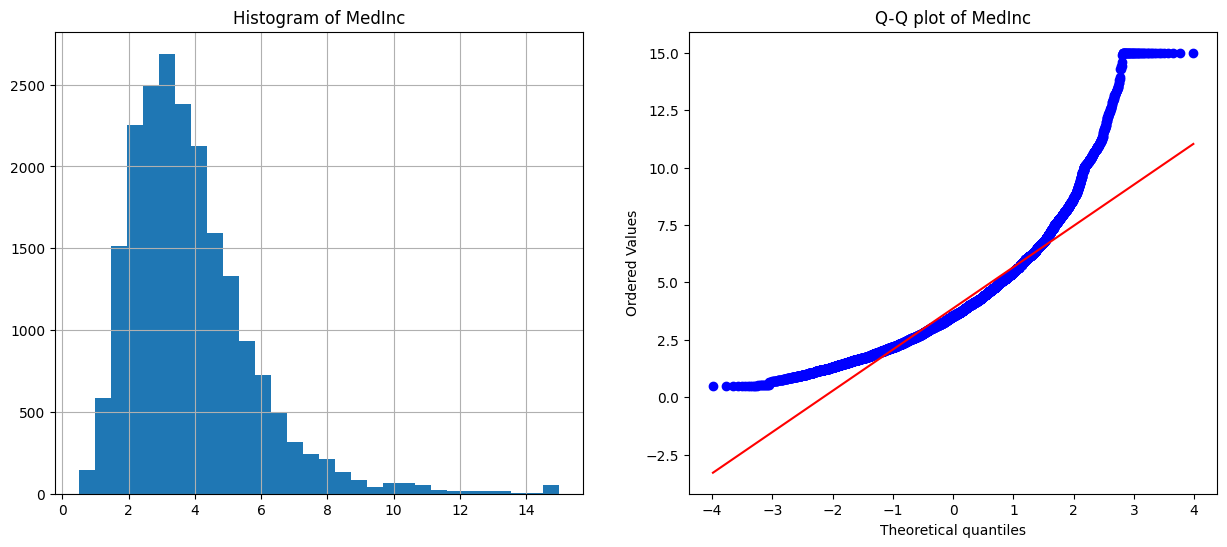

In [5]:
# Check function output

diagnostic_plots(X, "MedInc")

## Logarithmic transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [7]:
# list with the variables to transform

variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]

In [8]:
# apply log to a set of variables

X_tf[variables] = np.log(X[variables])

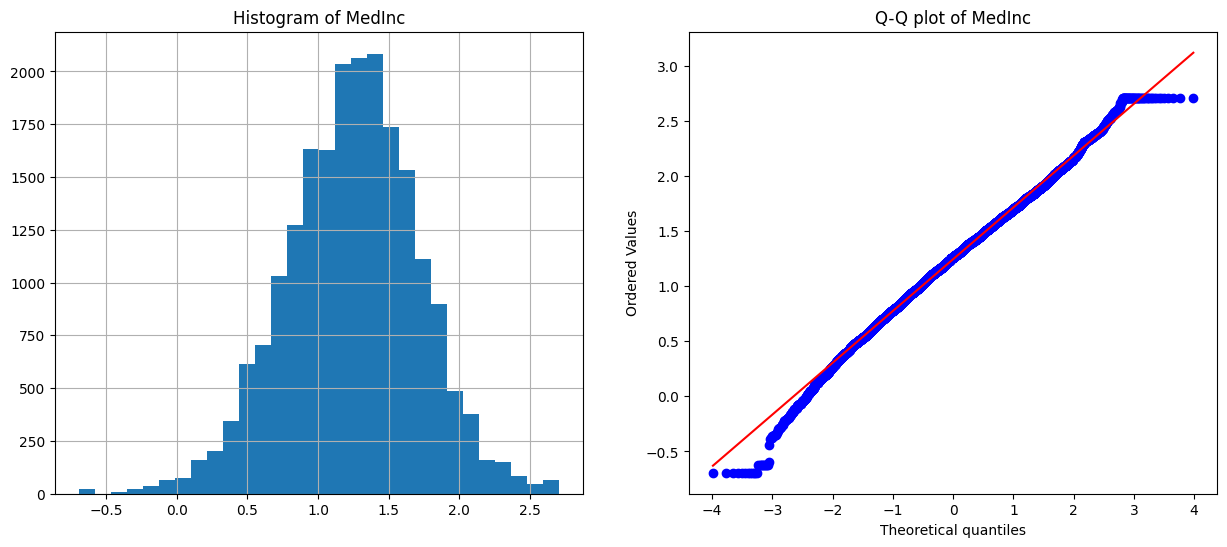

In [9]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")

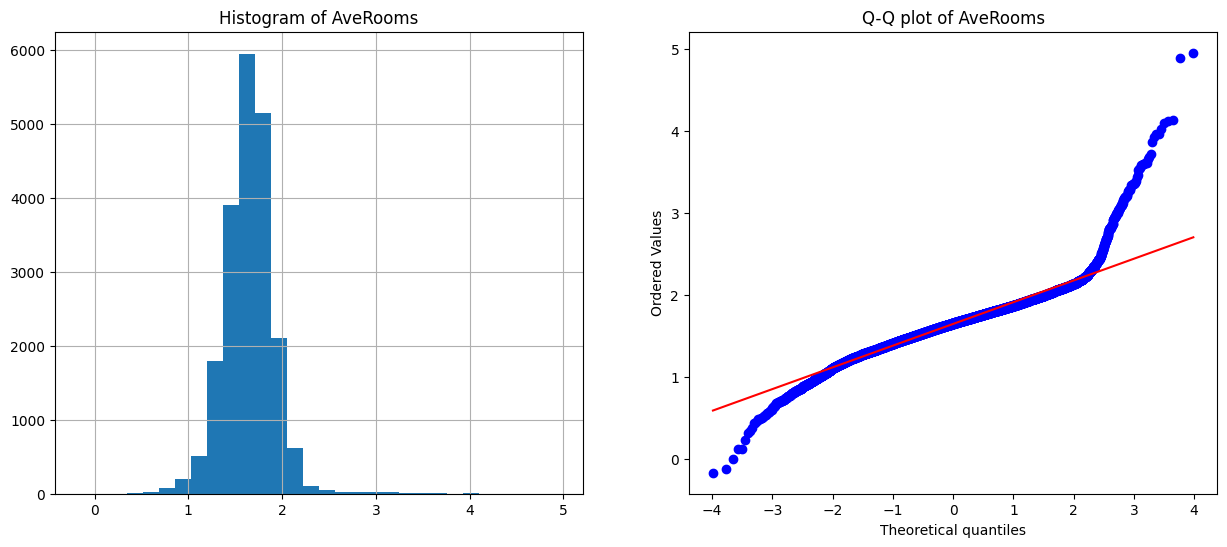

In [10]:
diagnostic_plots(X_tf, "AveRooms")

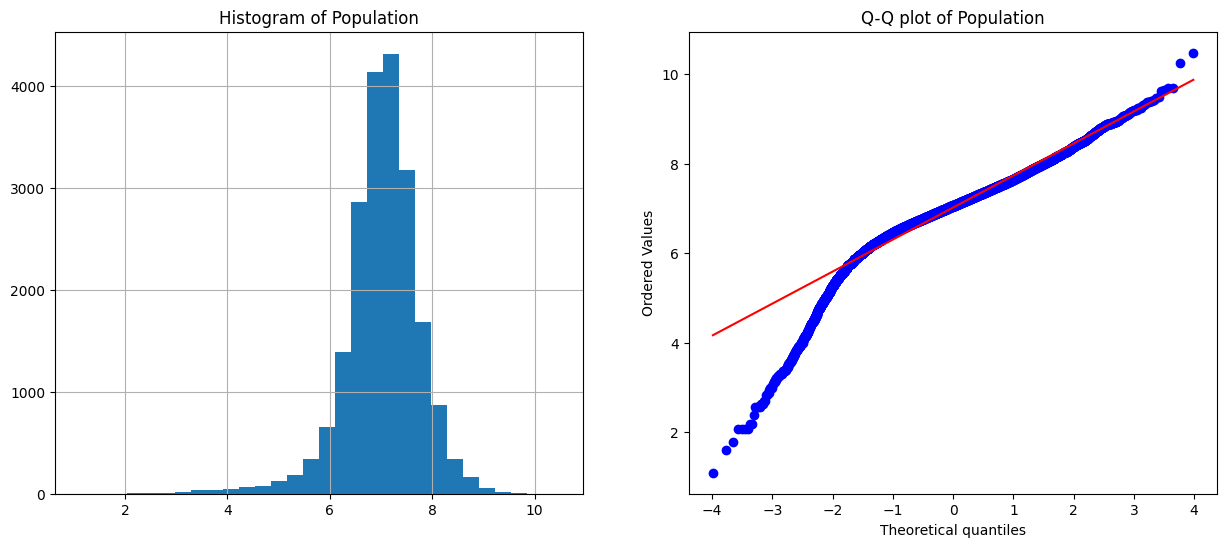

In [11]:
diagnostic_plots(X_tf, "Population")

## Logarithmic transformation with Scikit-learn

In [12]:
from sklearn.preprocessing import FunctionTransformer

In [13]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [14]:
# set up the transformer with NumPy log as parameter

transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

In [15]:
# transform subset of dataframe (remember that we
# made a copy earlier.)

X_tf[variables] = transformer.transform(X[variables])

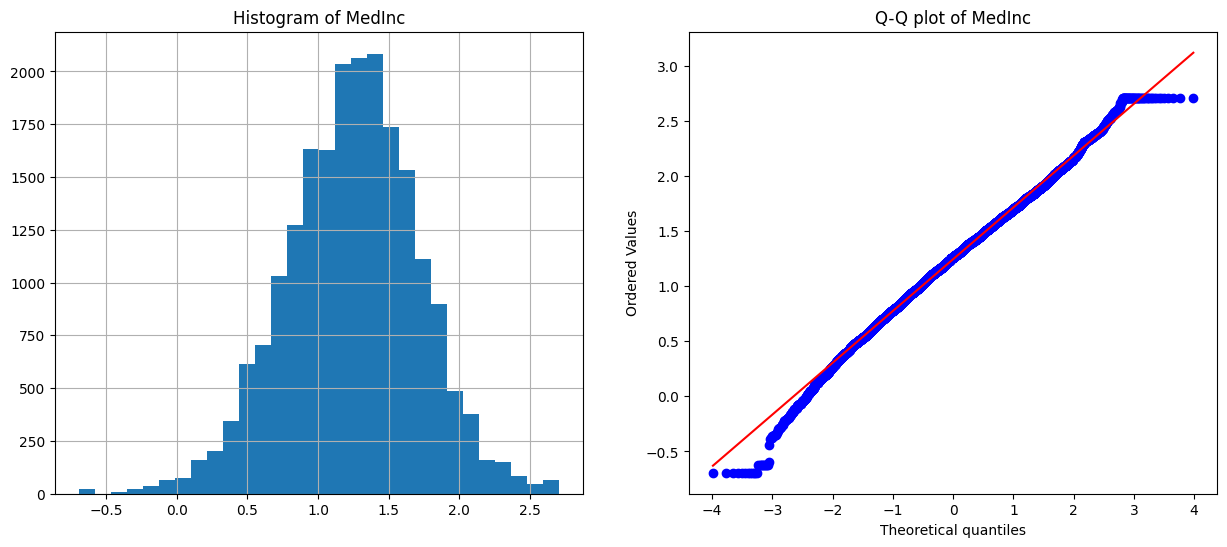

In [16]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")

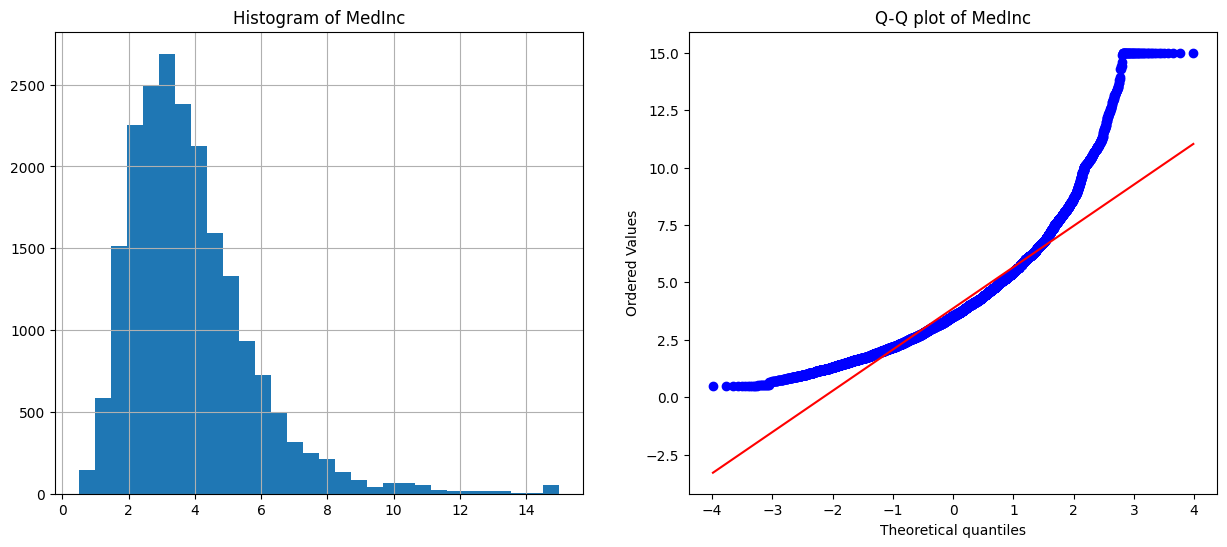

In [17]:
# revert to the original representation

X_tf[variables] = transformer.inverse_transform(X_tf[variables])

diagnostic_plots(X_tf, "MedInc")

# Reciprocal transformation

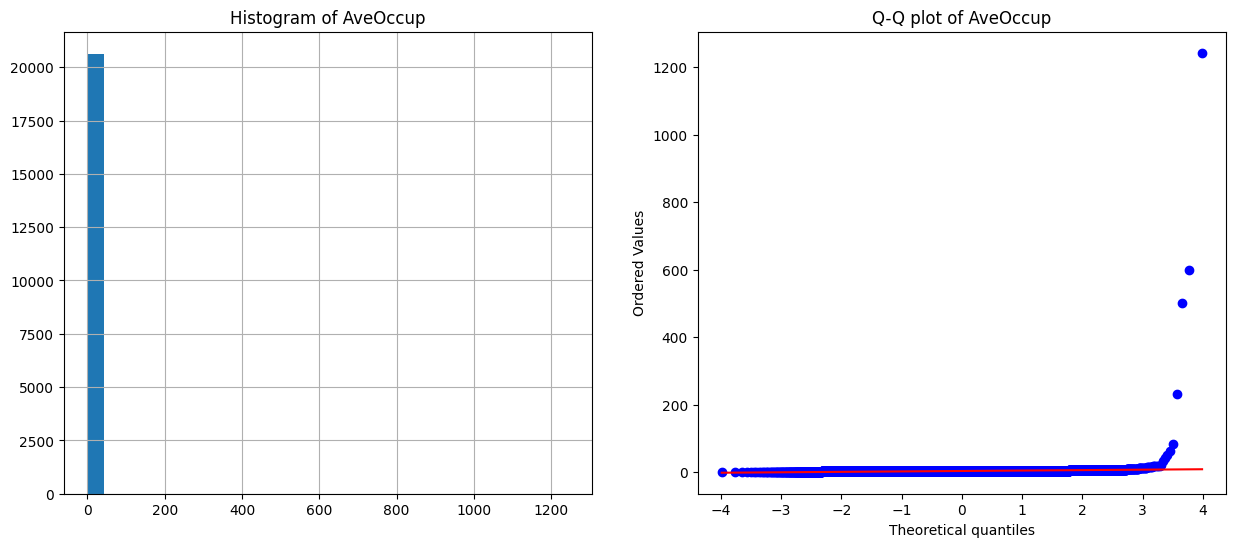

In [18]:
# Check function output

# AveOccup = average number of household members (number of people per household)
# AveOccup = number of members / number of houses

diagnostic_plots(X, "AveOccup")

## Reciprocal transformation with NumPy

In [19]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [20]:
# apply the reciprocal to a set of variables

X_tf["AveOccup"] = np.reciprocal(X_tf["AveOccup"])

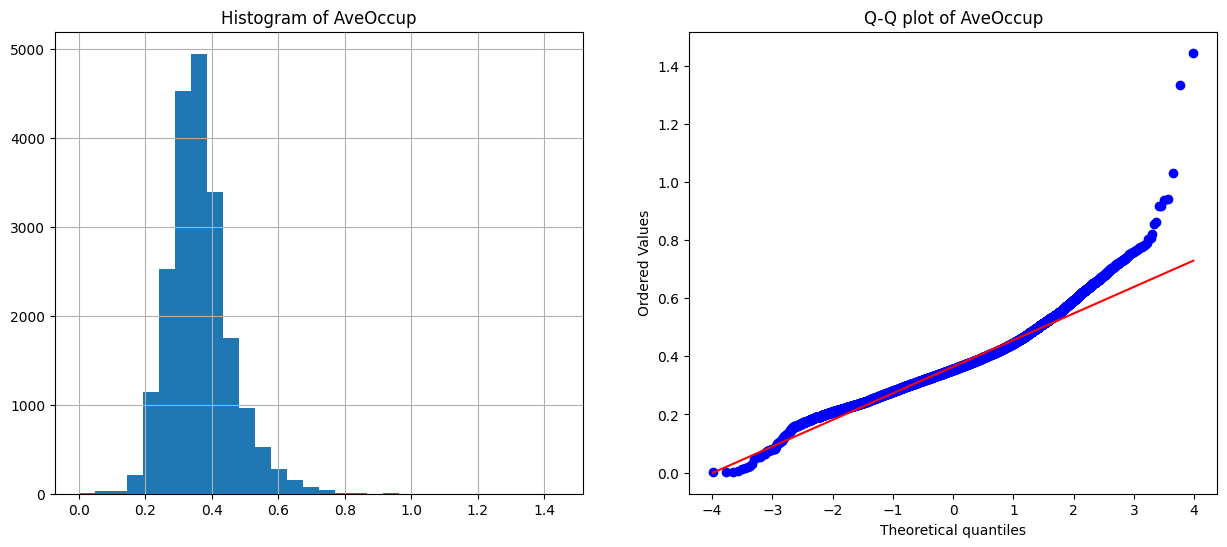

In [21]:
# use diagnostic plot function to corroborate variable transformation

# AveOccup = number of households per number of people)
# AveOccup = number of houses / number of people

diagnostic_plots(X_tf, "AveOccup")

## Reciprocal transformation with Scikit-learn

In [22]:
from sklearn.preprocessing import FunctionTransformer

In [23]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [24]:
# start the transformer with NumPy reciprocal as parameter

transformer = FunctionTransformer(func=np.reciprocal)

In [25]:
# transform subset of dataframe

X_tf["AveOccup"] = transformer.transform(X["AveOccup"])

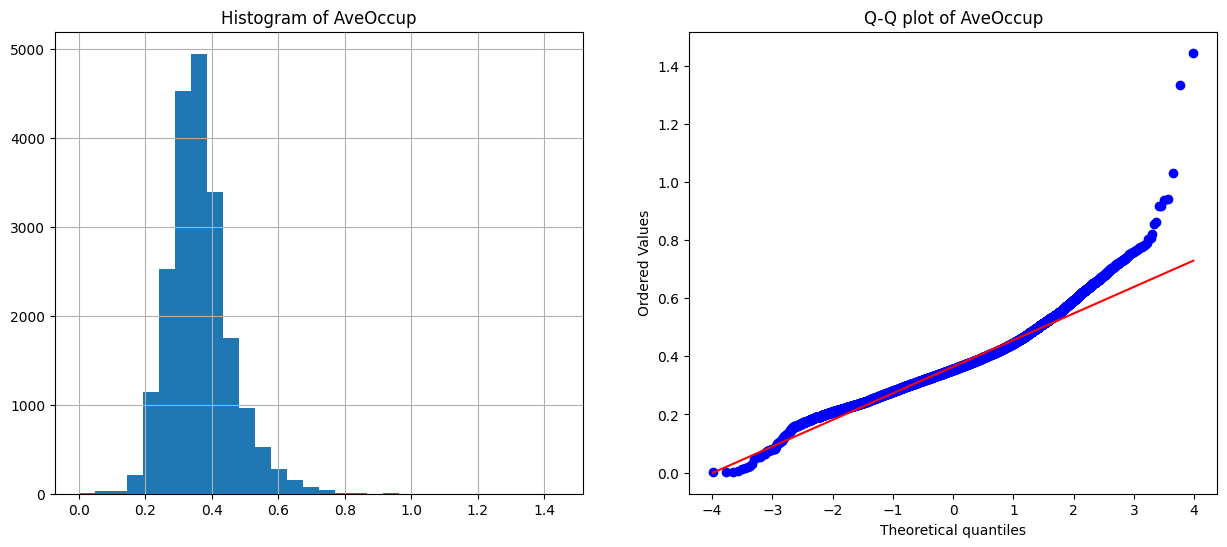

In [26]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "AveOccup")

# Square-root transformation

In [27]:
# create dataframe
df = pd.DataFrame()

# draw samples from a poisson distribution
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)

# display top rows
df.head()

,counts1,counts2
0,4,3
1,1,4
2,5,0
3,1,3
4,3,0


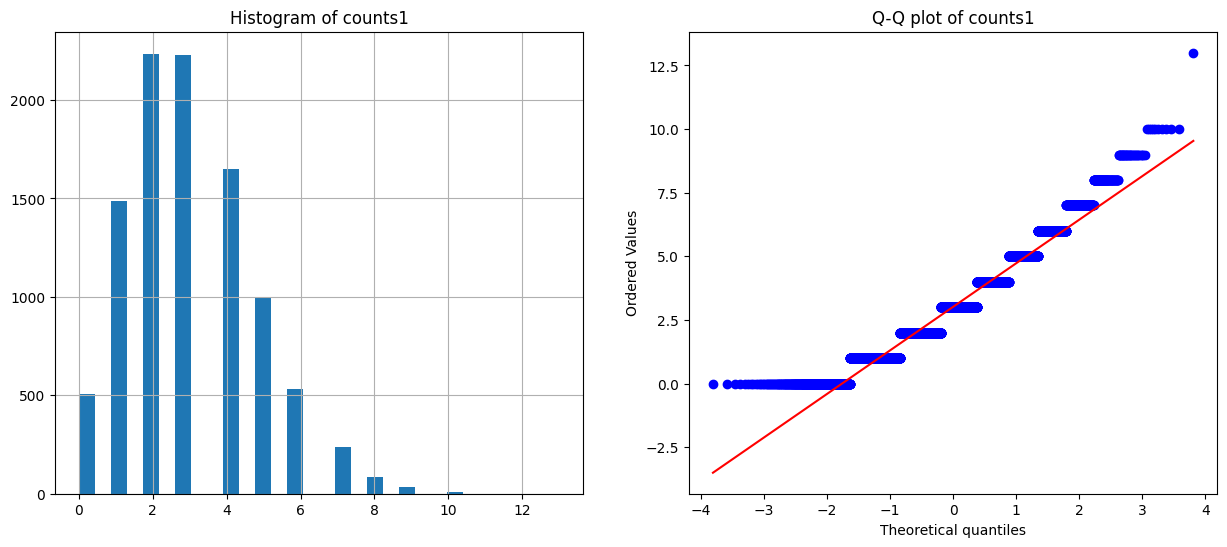

In [28]:
diagnostic_plots(df, "counts1")

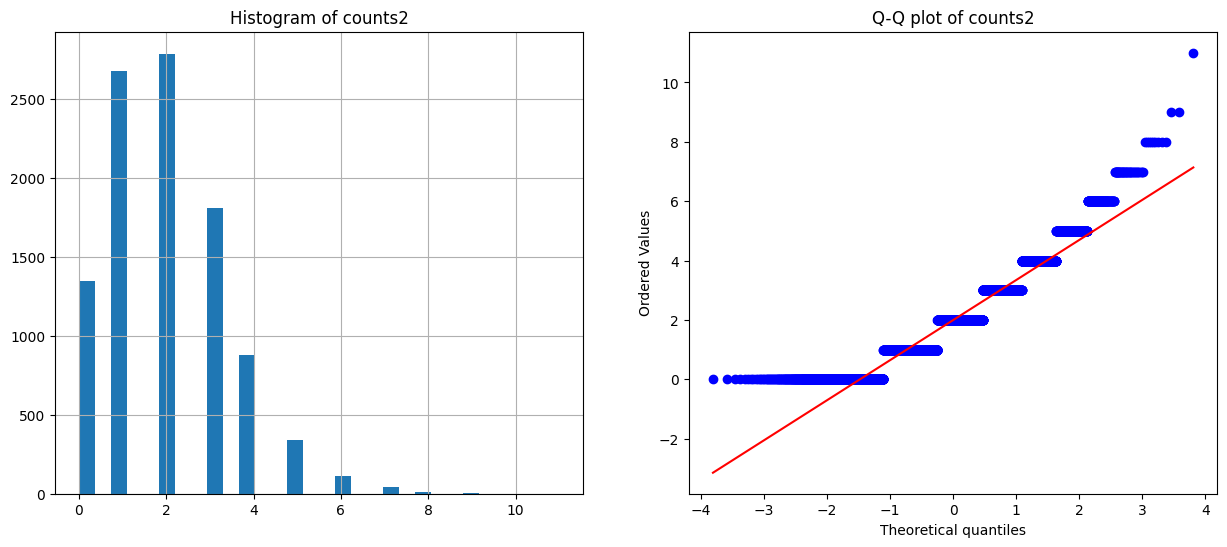

In [29]:
diagnostic_plots(df, "counts2")

## Square root with NumPy

In [30]:
# make a copy of the dataframe

df_tf = df.copy()

In [31]:
# apply square root transformation

df_tf[["counts1", "counts2"]] = np.sqrt(df[["counts1", "counts2"]])

df_tf[["counts1", "counts2"]] = np.round(df_tf[["counts1", "counts2"]], 2)

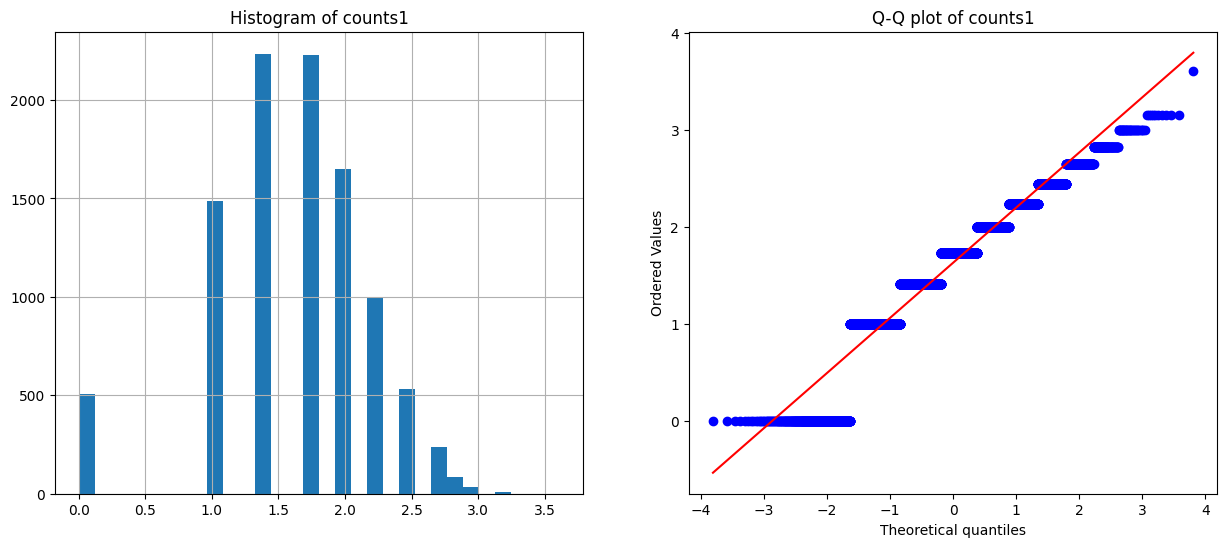

In [32]:
diagnostic_plots(df_tf, "counts1")

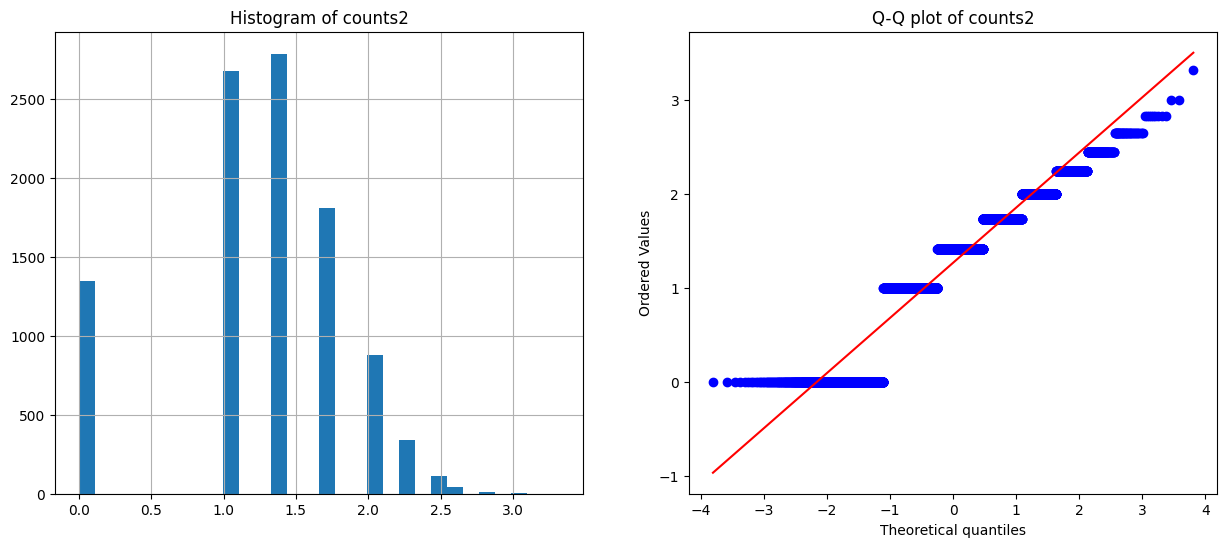

In [33]:
diagnostic_plots(df_tf, "counts2")

## Square root with Scikit-learn

In [34]:
from sklearn.preprocessing import FunctionTransformer

In [35]:
# make a copy of the data

df_tf = df.copy()

In [36]:
# set up transformer with desired operations

transformer = FunctionTransformer(func=lambda x: np.round(np.sqrt(x), 2))

In [37]:
# transform slice of dataframe with variables to transform

df_tf = transformer.transform(df[["counts1", "counts2"]])

In [ ]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts1")

In [ ]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts2")

# Power transformation

In [ ]:
# check original distribution (not included in this recipe of book)

diagnostic_plots(X, "MedInc")

In [ ]:
diagnostic_plots(X, "Population")

## Power transformation with NumPy

In [ ]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [ ]:
# make a list with the variables to transform

variables = ["MedInc", "Population"]

In [ ]:
# apply a 0.3 exponent power transformation to a set of variables

X_tf[variables] = np.power(X[variables], 0.3)

In [ ]:
# check the distribution of the transformed variable

diagnostic_plots(X_tf, "MedInc")

In [ ]:
diagnostic_plots(X_tf, "Population")

## Power transformation with Scikit-learn

In [ ]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [ ]:
# set up the transformer with a user defined function, in this
# case the 0.3 power transformation

transformer = FunctionTransformer(lambda x: np.power(x, 0.3))

In [ ]:
# transform slice of dataframe with indicated variables

X_tf[variables] = transformer.transform(X[variables])

In [ ]:
# visualize the transformation (not in book)

diagnostic_plots(X_tf, "MedInc")

In [ ]:
diagnostic_plots(X_tf, "Population")

# Box-Cox transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
# drop lat and lon
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

In [ ]:
# Plot histograms to inspect variable distributions

X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [ ]:
# capture variable names in a list

variables = list(X.columns)
variables

In [ ]:
# Make Q-Q plots for all variables


def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # location in figure
        ax = plt.subplot(2, 3, i + 1)

        # variable to plot
        var = variables[i]

        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()

In [ ]:
make_qqplot(X)

## Box-Cox transformation with Scikit-learn

In [ ]:
# initialize the transformer with box-cox

transformer = PowerTransformer(method="box-cox", standardize=False)

In [ ]:
# fit transformer: transformer will learn the lambdas

transformer.fit(X)

In [ ]:
# lambdas are stored in a transformer attribute

transformer.lambdas_

In [ ]:
# transform data: returns NumPy array

X_tf = transformer.transform(X)

X_tf

In [ ]:
# transform NumPy array to pandas dataframe

X_tf = pd.DataFrame(X_tf, columns=variables)

In [ ]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [ ]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)

# Yeo-Johnson transformation

In [ ]:
# initialize a transformer with yeo-johnson

transformer = PowerTransformer(method="yeo-johnson", standardize=False)

In [ ]:
# fit transformer: transformer will learn the lambdas

transformer.fit(X)

In [ ]:
# lambdas are stored in a transformer attribute

transformer.lambdas_

In [ ]:
# transform data: returns NumPy array

X_tf = transformer.transform(X)

X_tf

In [ ]:
# transform NumPy array to pandas dataframe

X_tf = pd.DataFrame(X_tf, columns=variables)

In [ ]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [ ]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)